In [4]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


In [ ]:
def calc_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(len(sorted_data)) / (len(sorted_data))
    median = np.median(sorted_data)
    sorted_data = np.append(sorted_data, np.ones(1))
    cdf = np.append(cdf, np.ones(1))
    auc = np.trapezoid(cdf, sorted_data)
    
    return sorted_data, cdf, median, auc


In [31]:
path_LSTM = Path("results/run_LSTM")
path_SHM = Path("results/run_SHM")
run_Tower = Path("results/run_Tower")

paths_results = [path_LSTM, path_SHM, run_Tower]

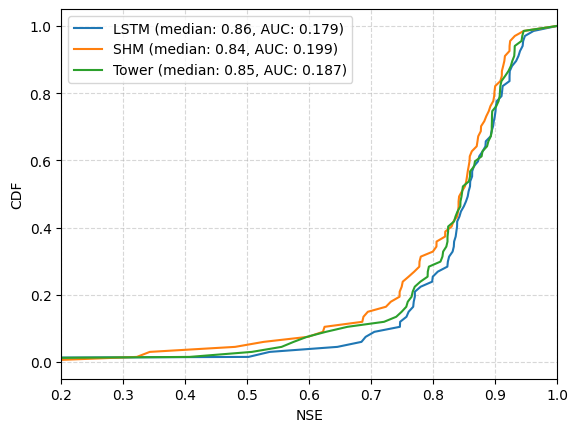

In [40]:
fig, ax = plt.subplots()
for path in paths_results:
    metrics = json.load(open(path / "metrics.json"))
    nse = [metric["nse"] for metric in metrics.values()]
    sorted_data, cdf, median, auc = calc_cdf(nse)
    name = str(path.name).split("_")[-1]
    ax.plot(sorted_data, cdf, label=f"{name} (median: {median:.2f}, AUC: {auc:.3f})")
ax.set_xlim(0.2, 1)
ax.set_xlabel("NSE")
ax.set_ylabel("CDF")
ax.grid(ls="--", alpha=0.5)
plt.legend()
plt.show()

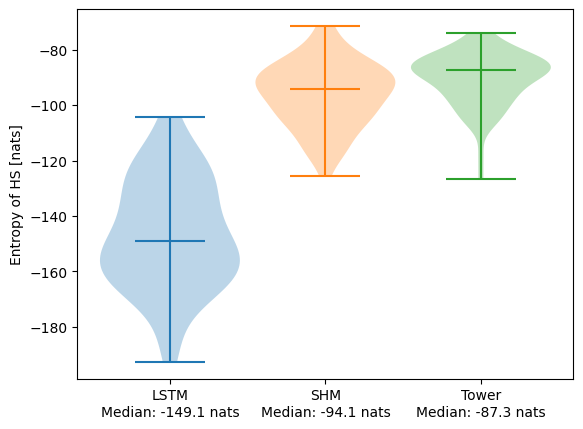

In [62]:
fig, ax = plt.subplots()
names = []
for path in paths_results:
    metrics = json.load(open(path / "metrics.json"))
    h_hs = [metric["h_hs"] for metric in metrics.values()]
    names.append(str(path.name).split("_")[-1] + f"\nMedian: {np.median(h_hs):.1f} nats")
    ax.violinplot(h_hs, positions=[len(names)], widths=0.9, showmedians=True)
ax.set_xticks(range(1, len(names) + 1))
ax.set_xticklabels(names)
ax.set_ylabel("Entropy of HS [nats]")
plt.show()